# Practice 4A: Linear Regression
### Diabetes dataset : regression problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

# (1) Load explore and preprocess (if needed) the dataset

In [3]:
df=pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
df.shape

(442, 10)

In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [6]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

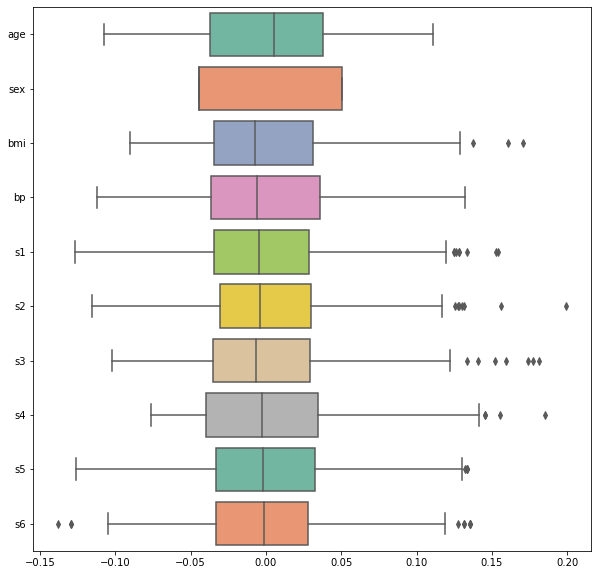

In [7]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

The dataset ha 10 features and 442 samples. Features are all numerical, target is also numerical (integer numbers). There are no missing value and features are already scaled. No need for further preprocessing. Features are already scaled, all with zero mean.

#(2) Use the transformed features (do not add interactions or polinomial features at this point) as dataset X. Split the dataset in train and test and use the training set to retrieve the best $\boldsymbol{\theta}$ vector by using the closed forms Normal Equation. Evaluate the model with the trained $\boldsymbol{\theta}$ on the test set

In [8]:
X=df.values
y=data.target

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train] # add x0 = 1 to each instance 

theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(y_train) # NORMAL EQUATION

In [11]:
X_b_test = np.c_[np.ones((len(X_test), 1)), X_test] # add x0 = 1 to each instance 
y_predict = X_b_test.dot(theta_best)

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("test RMSE={}".format(np.sqrt(mean_squared_error(y_test, y_predict))))
print("test R2={}".format(r2_score(y_test, y_predict)))

test RMSE=50.61872861291196
test R2=0.5914768183354984


In [13]:
print("train RMSE={}".format(np.sqrt(mean_squared_error(y_train, X_b_train.dot(theta_best)))))
print("train R2={}".format(r2_score(y_train, X_b_train.dot(theta_best))))

train RMSE=54.9949099979267
train R2=0.4737972542122503


Both RMSE and R2 are quite high values both on train and on test. This means the model is underfitting. This implies we need some features rtansformation (interaction and polinomials for example) in order to increase its complexity and hence to increase its possibility to actually fit the data. 

#(3) Use the Sklearn implementation of Linear Regression to find the best $\boldsymbol{\theta}$ vector. Evaluate the model with the trained $\boldsymbol{\theta}$ on the test set. Compare the results with the previously obtained values.

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict=lin_reg.predict(X_test)

In [15]:
print("test RMSE={}".format(np.sqrt(mean_squared_error(y_test, y_predict))))
print("test R2={}".format(r2_score(y_test, y_predict)))

test RMSE=50.6187286129119
test R2=0.5914768183354993


In [16]:
print("train RMSE={}".format(np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train)))))
print("train R2={}".format(r2_score(y_train, lin_reg.predict(X_train))))

train RMSE=54.9949099979267
train R2=0.4737972542122503


The sklearn implementation of the Linear Regression provides similar results to the ones obtained above. The model is underfitting.  

#(4) Use BatchGradientDescent (NOT the sklearn implementation) with $\eta=0.1$ and *number of iterations* $=100$. Evaluate the model with the trained $\boldsymbol{\theta}$ on the test set. Compare the results with the previously obtained values.

In [17]:
eta = 0.1 # learning rate 
n_iterations = 100 
m=X.shape[0]

theta = np.random.randn(X.shape[1]+1,1)  # coefficients random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train.reshape(-1,1)) 
  theta = theta - eta * gradients

In [18]:
X_b_test = np.c_[np.ones((len(X_test), 1)), X_test] # add x0 = 1 to each instance 
y_predict = X_b_test.dot(theta)

In [19]:
print("test RMSE={}".format(np.sqrt(mean_squared_error(y_test, y_predict))))
print("test R2={}".format(r2_score(y_test, y_predict)))

test RMSE=76.50197609028538
test R2=0.06687559800021659


In [20]:
print("train RMSE={}".format(np.sqrt(mean_squared_error(y_train, X_b_train.dot(theta_best)))))
print("train R2={}".format(r2_score(y_train, X_b_train.dot(theta_best))))

train RMSE=54.9949099979267
train R2=0.4737972542122503


The results are much worst than the previous ones. The model is extremelly underfitting. On the test set, the R2 score is quite small. We saw from the training above that the complexity of this model is too low to be able to fit the data. Here, more than before, we are performing very badly on the test set. A reason for this behavior might be that the learning rate is too low, and in 100 iteration it will not be able to arrive close to the minimum of the cost function. 

#(5) GridSearch on diferent values of $\eta$ and evaluate the best one wich allows to reach the highest test accuracy with BatchGradientDescent over 100 iterations

eta = 0.0001
test RMSE=177.33116384554862
test R2=-4.013769554428297
train RMSE=166.15436013142377
train R2=-3.8032103152375853
eta = 0.001
test RMSE=161.28736644913826
test R2=-3.1475816210225513
train RMSE=150.2505323879927
train R2=-2.927716722309794
eta = 0.005
test RMSE=116.15964911843867
test R2=-1.1513190502434836
train RMSE=106.09106723983224
train R2=-0.9582392686898578
eta = 0.1
test RMSE=76.56090073818112
test R2=0.0654375906439072
train RMSE=72.83877920515458
train R2=0.07693255313694602
eta = 0.2
test RMSE=73.76645908611842
test R2=0.13241484127044645
train RMSE=70.45577374430933
train R2=0.13634300261962984
eta = 0.5
test RMSE=67.54382093027135
test R2=0.2726130757646148
train RMSE=65.36567192794631
train R2=0.25662563857732246
eta = 1
test RMSE=61.78594325383915
test R2=0.39134162467753764
train RMSE=61.13474482197732
train R2=0.34974406276725745
eta = 1.2
test RMSE=60.29478680107525
test R2=0.4203661128472268
train RMSE=60.15668344436598
train R2=0.370383808287304
eta =

Text(0.5, 0, 'eta')

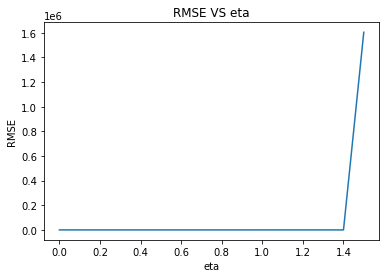

In [21]:
eta_values = [0.0001, 0.001, 0.005, 0.1, 0.2, 0.5, 1, 1.2, 1.3, 1.4, 1.5] # learning rate 
n_iterations = 100 

r2_scores = []
rmse_scores = []

for eta in eta_values:
  print("eta = {}".format(eta))
  theta = np.random.randn(X.shape[1]+1,1)  # coefficients random initialization
  for iteration in range(n_iterations):
    gradients = (2/X.shape[0]) * X_b_train.T.dot(X_b_train.dot(theta) - y_train.reshape(-1,1)) 
    theta = theta - eta * gradients
  X_b_test = np.c_[np.ones((len(X_test), 1)), X_test] # add x0 = 1 to each instance 
  y_predict = X_b_test.dot(theta)

  rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_predict)))
  r2_scores.append(r2_score(y_test, y_predict))

  print("test RMSE={}".format(np.sqrt(mean_squared_error(y_test, y_predict))))
  print("test R2={}".format(r2_score(y_test, y_predict))) 
  print("train RMSE={}".format(np.sqrt(mean_squared_error(y_train, X_b_train.dot(theta)))))
  print("train R2={}".format(r2_score(y_train, X_b_train.dot(theta))))
  
plt.plot(eta_values,rmse_scores)
plt.title("RMSE VS eta")
plt.ylabel("RMSE")
plt.xlabel("eta")


The model requires an higher value of $\eta$ ($\eta=1.4$) in order to achieve, with 100 epoches of Gradient Descent, a result comparable with the previous ones. Still we are not doing a good job on fitting the data. 

#(6) Use Stochastic Gradient Descent with an appropriate number of `epoches`  and `learning_schedule` to reach solutions comparable to the previous one

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=1.5, learning_rate='invscaling') 
sgd_reg.fit(X_train, y_train.ravel())

y_predict = sgd_reg.predict(X_test)

print("test RMSE={}".format(np.sqrt(mean_squared_error(y_test, y_predict))))
print("test R2={}".format(r2_score(y_test, y_predict))) 
print("train RMSE={}".format(np.sqrt(mean_squared_error(y_train, X_b_train.dot(theta)))))
print("train R2={}".format(r2_score(y_train, X_b_train.dot(theta))))

test RMSE=51.31959396349087
test R2=0.5800857013324003
train RMSE=1603886.1626080659
train R2=-447564053.8363202


With a number of epoches equal to 1000 and learning schedule set ot *inverse scaling* (take a look at the documentaiton https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html), we can reach similar results as the procedures above. 

As a general comment, non of the models trained above is satisfactory. We are underfitting the data. Hence, a good approach here is to increase the complexity of the model by adding transformed features (i.e., interactions and polinomials).